In [1]:
%matplotlib notebook
import matplotlib
import seaborn as sb
from matplotlib import pyplot as plt
import numpy as np

# Jupyter Specifics
%matplotlib inline
from IPython.display import display, HTML
from ipywidgets.widgets import interact, interactive, IntSlider, FloatSlider, Layout, ToggleButton, ToggleButtons, fixed
display(HTML("<style>.container { width:100% !important; }</style>"))
style = {'description_width': '100px'}
slider_layout = Layout(width='99%')

/Users/n/.pyenv/versions/3.7.2/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:

import umap
import umap.plot

from sklearn.decomposition import PCA
from sklearn import cluster
from sklearn.cluster import AgglomerativeClustering
import hdbscan


# Introduction

This is a purely empirical study on dependence of the validity measure of clustering quality, as a function of dimension.

The approach is to create two clusters whose centers are a fixed distance, embedded in spaces of varying dimensions, calculating validity for clusterings in each dimension, to infer dependence of validity on dimension.

Hypothesis is that if the clusters are separated by the same Euclidean distance, the clustering quality should be equivalent, so if validity changes systematically with dimension it must be corrected to be a good clustering quality measure

# 2d for intuition

In [3]:
from numpy.random import multivariate_normal as mnorm

Call as:
```
mnorm(mean, covariance, Npoints)
```

In [4]:
[3]*10+4*[10]

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 10, 10, 10, 10]

In [5]:
(1, 3)

(1, 3)

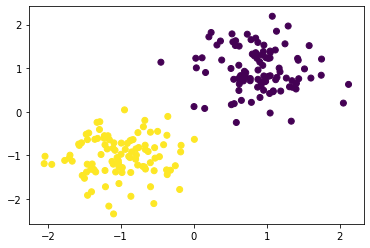

In [6]:
wid = 0.2
foo1 = mnorm(np.array([-1,-1]),np.array([[wid,0],[0,wid]]),100)
foo2 = mnorm(np.array([1,1]),np.array([[wid,0],[0,wid]]),100)
foo = np.concatenate((foo1,foo2))
colors = [1]*100+[0]*100

plt.scatter(foo[:,0],foo[:,1],c=colors);

In [7]:
np.concatenate((foo1,foo2)).shape

(200, 2)

In [8]:
wid = 0.2
foo1 = mnorm(np.array([-1,-1]),np.array([[wid,0],[0,wid]]),100)
foo2 = mnorm(np.array([1,1]),np.array([[wid,0],[0,wid]]),100)
foo = np.concatenate((foo1,foo2))

min_cluster_size = minc = 3
min_samples = 3
clusterer = hdbscan.HDBSCAN(min_cluster_size=minc,min_samples=min_samples,gen_min_span_tree=True)

fool = clusterer.fit_predict(foo)

hdbscan.validity.validity_index(foo, fool)

0.5671938630178436

In [9]:

val = []
xx = np.arange(0.02,0.5,.02)
min_cluster_size = minc = 3
min_samples = 3
clusterer = hdbscan.HDBSCAN(min_cluster_size=minc,min_samples=min_samples,gen_min_span_tree=True)


nave=10
for wid in xx:
    valtmp = []
    for _ in range(nave):
        foo1 = mnorm(np.array([-1,-1]),np.array([[wid,0],[0,wid]]),100)
        foo2 = mnorm(np.array([1,1]),np.array([[wid,0],[0,wid]]),100)
        foo = np.concatenate((foo1,foo2))
        fool = clusterer.fit_predict(foo)
        valtmp.append(hdbscan.validity.validity_index(foo, fool))
    val.append(np.mean(valtmp))

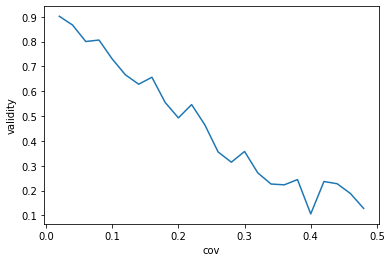

In [11]:
plt.plot(xx,val)
plt.ylabel("validity")
plt.xlabel('cov');


# n dim

Setup:  

* Create two clusters of 100 random points, centered at (-1,...,-1) and at (1,...,1) in d-dim space
* run hdbscan to detect the clusters
* compute validity
* repeat 40 times, to get average validity.
* repeat for d ranging from 2 to 15

In [14]:
dim = 10
np.full(dim,-1)

(10,)

In [21]:
dim=4
foo = np.zeros((dim,dim))
for i in range(len(foo)):
    foo[i][i] = 0.2
foo

array([[0.2, 0. , 0. , 0. ],
       [0. , 0.2, 0. , 0. ],
       [0. , 0. , 0.2, 0. ],
       [0. , 0. , 0. , 0.2]])

In [36]:
wid = 0.2
dim = 4
mn1 = np.full(dim,-1)
mn2 = np.full(dim,1)
covar = np.zeros((dim,dim))
for i in range(len(covar)):
    covar[i][i] = wid
foo1 = mnorm(mn1,covar,100)
foo2 = mnorm(mn2,covar,100)
foo = np.concatenate((foo1,foo2))

min_cluster_size = minc = 3
min_samples = 3
clusterer = hdbscan.HDBSCAN(min_cluster_size=minc,min_samples=min_samples,gen_min_span_tree=True)
fool = clusterer.fit_predict(foo)
print(hdbscan.validity.validity_index(foo, fool))



0.6706388129540404


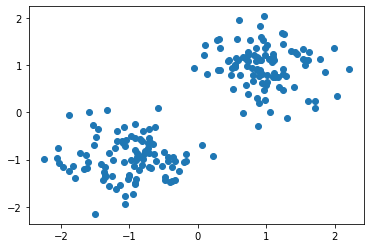

In [23]:
plt.scatter(foo[:,1],foo[:,2])

In [32]:
min_cluster_size = minc = 3
min_samples = 3
clusterer = hdbscan.HDBSCAN(min_cluster_size=minc,min_samples=min_samples,gen_min_span_tree=True)



wid = 0.2
dim = 4
nave = 40

val = []
for dim in range(2,16):
    valtmp=[]
    for _ in range(nave):
        mn1 = np.full(dim,-1)
        mn2 = np.full(dim,1)
        covar = np.zeros((dim,dim))
        for i in range(len(covar)):
            covar[i][i] = wid
        foo1 = mnorm(mn1,covar,100)
        foo2 = mnorm(mn2,covar,100)
        foo = np.concatenate((foo1,foo2))
        fool = clusterer.fit_predict(foo)
        valtmp.append(hdbscan.validity.validity_index(foo, fool))
    val.append(np.mean(valtmp))

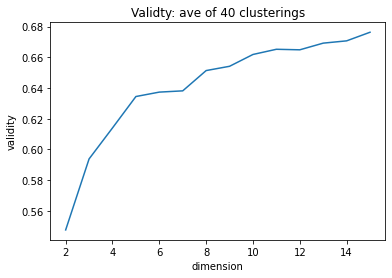

In [35]:
xx = list(range(2,16))
plt.plot(xx,val)
plt.xlabel('dimension')
plt.ylabel('validity')
plt.title('Validty: ave of 40 clusterings');

**Check to see how Euclidean distance between (-1,...,-1) and (1,...,1) changes**:

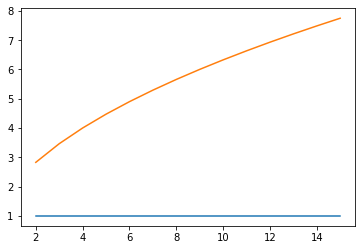

In [41]:
from scipy.spatial.distance import euclidean as dist

dd = []
ddd = []
for dim in range (2,16):
    mn1 = np.full(dim,-1)
    mn2 = np.full(dim,1)
    dst = dist(mn1,mn2)
    dd.append(dst)
    mnn1 = [x/dst for x in mn1]
    mnn2 = [x/dst for x in mn2]
    ddd.append(dist(mnn1,mnn2))
plt.plot(list(range(2,16)),ddd)
plt.plot(list(range(2,16)),dd);

**Put clusters unit distance apart along line between (-1,...,-1) and (1,...,.1)**

Normalize so that Euclidean distance between cluster centers is always the same (1). Then check validity dependence on dimension.

In [48]:
['wid = {}'.format(i) for i in range(5)]

['wid = 0', 'wid = 1', 'wid = 2', 'wid = 3', 'wid = 4']

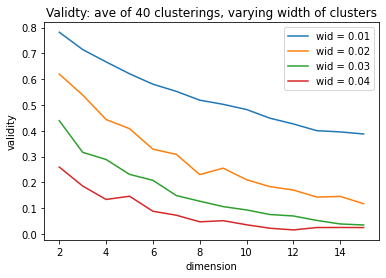

In [60]:
min_cluster_size = minc = 3
min_samples = 3
clusterer = hdbscan.HDBSCAN(min_cluster_size=minc,min_samples=min_samples,gen_min_span_tree=True)

wid = 0.1
dim = 4
nave = 40

xx = list(range(2,16))
widrange = np.arange(0.01,0.05,0.01)
for i in range(len(widrange)):
    val = []
    wid = widrange[i]
    for dim in xx:
        valtmp=[]
        for _ in range(nave):
            mn1 = np.full(dim,-1)
            mn2 = np.full(dim,1)
            dst = dist(mn1,mn2)  #  dist() = scikit.spatial.distance.euclidean()
            mn1 = [x/dst for x in mn1 ]
            mn2 = [x/dst for x in mn2]

            covar = np.zeros((dim,dim))
            for i in range(len(covar)):
                covar[i][i] = wid
            foo1 = mnorm(mn1,covar,100)
            foo2 = mnorm(mn2,covar,100)
            foo = np.concatenate((foo1,foo2))
            fool = clusterer.fit_predict(foo)
            valtmp.append(hdbscan.validity.validity_index(foo, fool))
        val.append(np.mean(valtmp))
    plt.plot(xx,val)
plt.xlabel('dimension')
plt.ylabel('validity')
plt.title('Validty: ave of 40 clusterings, varying width of clusters'); 
strwid=[]
for i in range(len(widrange)):
    strwid.append('wid = {}'.format(widrange[i]))
plt.legend(strwid);


**Conclusions:**

* There is an effect of dimension on validity.
* For clusters with centers having same Euclidean distance, the measured validity goes down
* For an intermediate cluster size, validity goes from ~0.6 to ~0.15 as dim goes from 2 to 15.
* But actual curves are nonlinear...
* Bottom line: higher dimension validities should be boosted for equivalence to low dimensional validities.  
    * using intermediate wid=0.2...
    * v=0.2 for d=10 should be boosted by factor of 3x to get to equivalent validity measured for d=2.
    * v=0.3 for d=6 should be boosted by factor of 1.5-2x.
    * Maybe something like: v_corrected = v*(3/8)*(d-2)